### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('train.csv')

### EDA

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.shape

(54808, 14)

In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

#### Dropping irrelevant columns

In [8]:
df.drop(['employee_id','region'],axis=1,inplace=True)

In [9]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#### Checking for null values

In [10]:
df.isnull().sum()

department                 0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

#### Nulll values imputation

In [11]:
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])

In [12]:
df.isnull().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

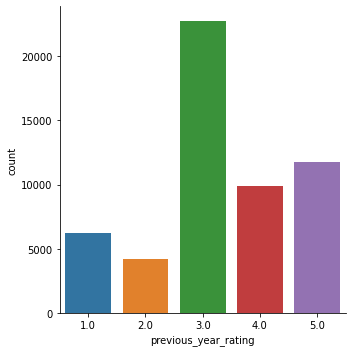

In [13]:
sns.catplot(x='previous_year_rating',data=df,kind='count')

In [14]:
df.shape

(54808, 12)

<AxesSubplot:xlabel='department', ylabel='count'>

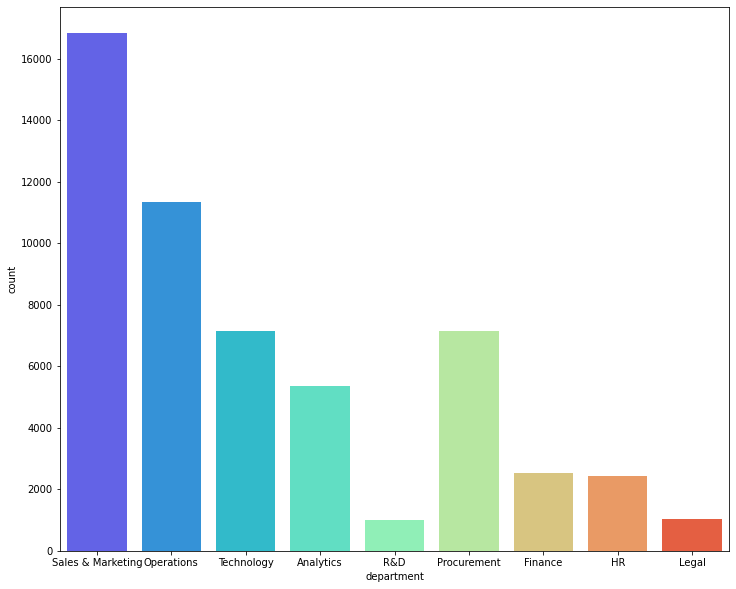

In [15]:
plt.figure(figsize=(12,10))
sns.countplot(x='department',data=df, palette='rainbow')

<AxesSubplot:xlabel='education', ylabel='count'>

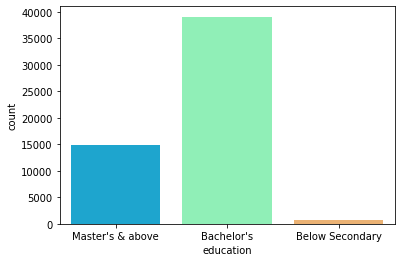

In [16]:
sns.countplot(x='education',data=df, palette='rainbow')


<AxesSubplot:xlabel='gender', ylabel='count'>

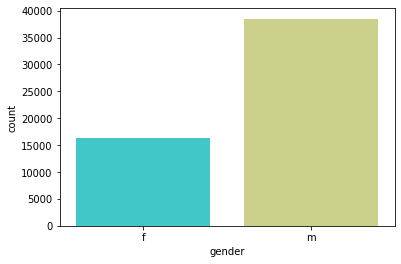

In [17]:
sns.countplot(x='gender',data=df, palette='rainbow')


In [18]:
df.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [19]:
df.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

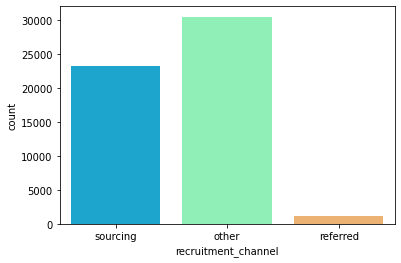

In [20]:
sns.countplot(x='recruitment_channel',data=df, palette='rainbow')


<AxesSubplot:xlabel='no_of_trainings', ylabel='count'>

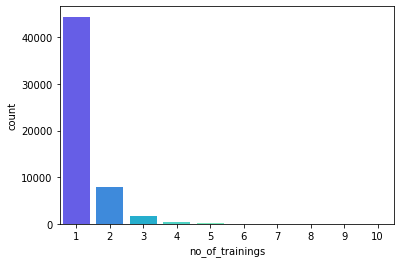

In [21]:
sns.countplot(x='no_of_trainings',data=df, palette='rainbow')


### LAbel Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['department']=le.fit_transform(df['department'])
df['education']=le.fit_transform(df['education'])
df['gender']=le.fit_transform(df['gender'])
df['recruitment_channel']=le.fit_transform(df['recruitment_channel'])
                                  
                                  
                                  
                                  

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  int32  
 1   education             54808 non-null  int32  
 2   gender                54808 non-null  int32  
 3   recruitment_channel   54808 non-null  int32  
 4   no_of_trainings       54808 non-null  int64  
 5   age                   54808 non-null  int64  
 6   previous_year_rating  54808 non-null  float64
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int32(4), int64(7)
memory usage: 4.2 MB


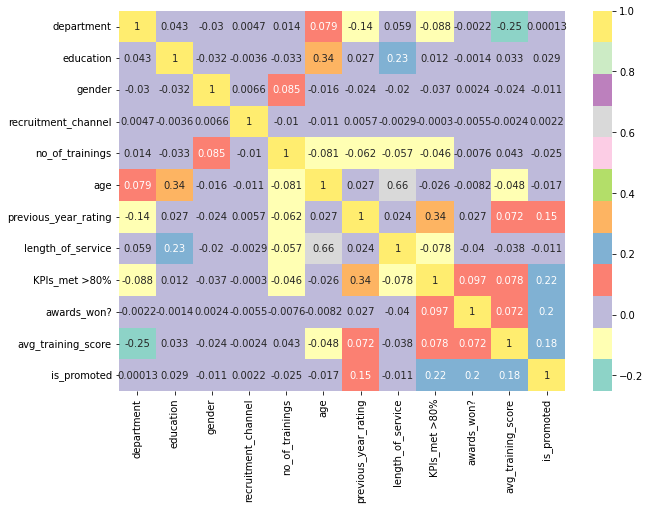

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='Set3')
plt.show()

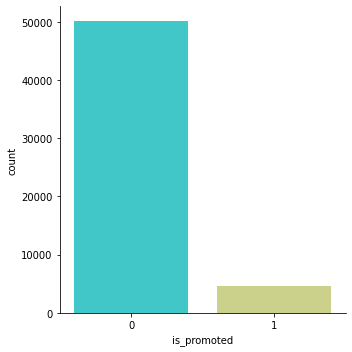

In [25]:
sns.catplot(x='is_promoted',data=df, palette='rainbow',kind='count')
# We can see lot of imbalance in data

In [26]:
df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [27]:
# Balancing dataset by undersampling
legit=df[df.is_promoted==0]
fraud=df[df.is_promoted==1]
legit_sample=legit.sample(n=4668)
df1=pd.concat([legit_sample,fraud],axis=0)

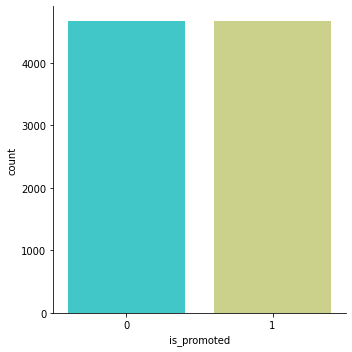

In [28]:
sns.catplot(x='is_promoted',data=df1, palette='rainbow',kind='count')


### Separation of dependant and independant variables

In [29]:
X=df1.drop('is_promoted',axis=1)
y=df1.is_promoted

### Train TEst split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
X_train=mc.fit_transform(X_train)
X_test=mc.fit_transform(X_test)

###  Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print("accuracy-score:",accuracy_score(y_test,y_hat))
print("f1-score:",f1_score(y_test,y_hat))
confusion_matrix(y_test,y_hat)

accuracy-score: 0.7205567451820128
f1-score: 0.7175324675324676


array([[683, 248],
       [274, 663]], dtype=int64)

### SVC

In [33]:
from sklearn.svm import SVC
sc=SVC(kernel='rbf')
sc.fit(X_train,y_train)
y_hat2=sc.predict(X_test)       
print("accuracy-score:",accuracy_score(y_test,y_hat2))
print("f1-score:",f1_score(y_test,y_hat2)) 
confusion_matrix(y_test,y_hat2)

accuracy-score: 0.7623126338329764
f1-score: 0.78256611165524


array([[625, 306],
       [138, 799]], dtype=int64)

### Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_hat3=rc.predict(X_test)
print("accuracy-score:",accuracy_score(y_test,y_hat3))
print("f1-score:",f1_score(y_test,y_hat3))
confusion_matrix(y_test,y_hat3)

accuracy-score: 0.80406852248394
f1-score: 0.8147773279352226


array([[697, 234],
       [132, 805]], dtype=int64)

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_hat4=dc.predict(X_test)
print("accuracy-score:",accuracy_score(y_test,y_hat4))
print("f1-score:",f1_score(y_test,y_hat4))
confusion_matrix(y_test,y_hat4)

accuracy-score: 0.771948608137045
f1-score: 0.7702265372168285


array([[728, 203],
       [223, 714]], dtype=int64)

### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier(n_neighbors=7)
kc.fit(X_train,y_train)
y_hat5=kc.predict(X_test)
print("accuracy-score:",accuracy_score(y_test,y_hat5))
print("f1-score:",f1_score(y_test,y_hat5))
confusion_matrix(y_test,y_hat5)

accuracy-score: 0.7751605995717344
f1-score: 0.7850562947799385


array([[681, 250],
       [170, 767]], dtype=int64)

#### Thus we are going to use Random Forest Classifier